## Data wrangling WeRateDogs
Bashayer Alshehri (1 Jul, 2020)

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Gather">Gathering Data</a></li>
<li><a href="#Asses">Assessing Data</a></li>
<li><a href="#Quality">Quality</a></li>
<li><a href="#Tidiness">Tidiness</a></li>
<li><a href="#Clean">Cleaning Data</a></li>    
<li><a href="#Store">Storing, Analyzing, and Visualizing Data</a></li>
<li><a href="#Ins1">Insight#1 & visualization</a></li>
<li><a href="#Ins2">Insight#2</a></li>
<li><a href="#Ins3">Insight#3 & visualization</a></li> 
</ul>

<a id='intro'></a>
### Introduction:

In this project, I aim to practice Data Wrangling which is an important step in Data Analysis, The Dataset that I used is the tweet archive of Twitter user @dog_rates, known as WeRateDogs.


In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
import requests
import tweepy 
import seaborn as sns
import json
import matplotlib.pyplot as plt
%matplotlib inline

<a id='Gather'></a>
### Gathering Data

1- **The WeRateDogs**: Twitter archive. (twitter_archive_enhanced.csv)

2- **The tweet image predictions**: i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3- Each tweet's retweet count and favorite ("like") count at a minimum. Using the tweet IDs in the WeRateDogs Twitter archive, **query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.**

### 1- The WeRateDogs Twitter archive. (twitter_archive_enhanced.csv) :

In [2]:
#Read TwitterArchive CSV file 
TwitterArchive = pd.read_csv('twitter-archive-enhanced.csv')

### 2- The tweet image predictions :

In [3]:
#Download image-predictions TSV file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [4]:
#Read TSV file
ImagePredictions = pd.read_csv('image-predictions.tsv',sep='\t')

### 3. Download Tweet JSON Data

In [1]:
# Personal Twitter API keys, Secrets, and Tokens
API_key = 'HIDDEN'
API_secret_key = 'HIDDEN'
Bearer_token = 'HIDDEN'
Access_Token = 'HIDDEN'
Access_Token_Secrete = 'HIDDEN'

In [6]:
# Create the Twitter API object and set rate limit params
auth = tweepy.OAuthHandler(API_key, API_secret_key)
auth.set_access_token(Access_Token, Access_Token_Secrete)

api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(),  wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [7]:
# Use Twitter API to collect status data 
tweetID = list(TwitterArchive['tweet_id'])

tweet_data = []
Not_found = []
for tweet_id in tweetID:
    try:
        data = api.get_status(tweet_id, tweet_mode='extended',wait_on_rate_limit = True,wait_on_rate_limit_notify = True)
        tweet_data.append(data)
    except:
        Not_found.append(tweet_id)
        

Rate limit reached. Sleeping for: 128
Rate limit reached. Sleeping for: 214


In [8]:
dicts = []
for json_tweet in tweet_data:
    dicts.append(json_tweet)

In [9]:
dicts

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'}

In [10]:

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(dicts, indent=4))

In [11]:
# put the info fro dicts in a dataframe called tweet JSON
_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']


        _list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                            })
        tweet_json = pd.DataFrame(_list, columns = ['tweet_id', 'favorite_count','retweet_count'])

In [12]:
tweet_json

tweet_id  favorite_count  retweet_count
0     892420643555336193           35930           7631
1     892177421306343426           31004           5643
2     891815181378084864           23328           3741
3     891689557279858688           39220           7804
4     891327558926688256           37463           8396
...                  ...             ...            ...
2326  666049248165822465              96             40
2327  666044226329800704             269            130
2328  666033412701032449             111             41
2329  666029285002620928             120             42
2330  666020888022790149            2394            459

[2331 rows x 3 columns]

<a id='Asses'></a>
### Assessing data

### Visual assessment

In [13]:
TwitterArchive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [14]:
ImagePredictions

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [15]:
tweet_json

tweet_id  favorite_count  retweet_count
0     892420643555336193           35930           7631
1     892177421306343426           31004           5643
2     891815181378084864           23328           3741
3     891689557279858688           39220           7804
4     891327558926688256           37463           8396
...                  ...             ...            ...
2326  666049248165822465              96             40
2327  666044226329800704             269            130
2328  666033412701032449             111             41
2329  666029285002620928             120             42
2330  666020888022790149            2394            459

[2331 rows x 3 columns]

### Programmatic assessment

### 1- TwitterArchive

In [16]:
TwitterArchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
sum(TwitterArchive['tweet_id'].duplicated())

0

In [18]:
rating_numerator = TwitterArchive['rating_numerator'].value_counts()
print(rating_numerator)

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64


In [19]:
for rate in rating_numerator:
    print("- "+TwitterArchive.loc[rate, 'text']) 
    print()

- RT @dog_rates: This is Philbert. His toilet broke and he doesn't know what to do. Trying not to panic. 11/10 furustrated af https://t.co/Nb…

- Meet Strudel. He's rather h*ckin pupset that your clothes clash. 11/10 click the link to see how u can help Strudel

https://t.co/3uxgLz8d0l https://t.co/O0ECL1StB2

- Say hello to Eugene &amp; Patti Melt. No matter how dysfunctional they get, they will never top their owners. Both 12/10 would pet at same time https://t.co/jQUdvtdYMu

- This is Pete. He has no eyes. Needs a guide doggo. Also appears to be considerably fluffy af. 12/10 would hug softly https://t.co/Xc0gyovCtK

- This is Burt. He thinks your thesis statement is comically underdeveloped. 12/10 intellectual af https://t.co/jH6EN9cEn6

- This is Monkey. She's supporting owners everywhere with her fancy #PrideMonth bandana. 13/10 love is love is love... https://t.co/lUcpnZDPz9

- @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s

- This is 

In [20]:
rating_denominator=TwitterArchive['rating_denominator'].value_counts()
print(rating_denominator)

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64


In [21]:
for rates in rating_denominator:
    print("- "+TwitterArchive.loc[rates, 'text']) 
    print()

- This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL

- This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ

- This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ

- This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB

- This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB

- This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV

- This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV

- This is Til

In [22]:
TwitterArchive['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Yoda         1
Jeffrie      1
Horace       1
Lili         1
Aldrick      1
Name: name, Length: 957, dtype: int64

In [23]:
TwitterArchive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [24]:
TwitterArchive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [25]:
TwitterArchive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [26]:
TwitterArchive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### 2- ImagePredictions

In [27]:
ImagePredictions.sample(5)

tweet_id                                          jpg_url  \
589   679132435750195208  https://pbs.twimg.com/media/CWzDWOkXAAAP0k7.jpg   
582   678798276842360832  https://pbs.twimg.com/media/CWuTbAKUsAAvZHh.jpg   
10    666063827256086533  https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
1401  768855141948723200  https://pbs.twimg.com/media/CquFrCKWAAAr32m.jpg   
2043  885984800019947520  https://pbs.twimg.com/media/DEumeWWV0AA-Z61.jpg   

      img_num                  p1   p1_conf  p1_dog                 p2  \
589         1  Scottish_deerhound  0.194610    True    Irish_wolfhound   
582         1            Airedale  0.583122    True      silky_terrier   
10          1    golden_retriever  0.775930    True    Tibetan_mastiff   
1401        1                chow  0.720219    True  Brabancon_griffon   
2043        1    Blenheim_spaniel  0.972494    True           Shih-Tzu   

       p2_conf  p2_dog                    p3   p3_conf  p3_dog  
589   0.162855    True       giant_schnauzer  0.159837    True  
582   0.129567    True      Lakeland_terrier  0.094727    True  
10    0.093718    True    Labrador_retriever  0.072427    True  
1401  0.058365    True            Rottweiler  0.055114    True  
2043  0.006630    True  Bernese_mountain_dog  0.006239    True

In [28]:
ImagePredictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
sum(ImagePredictions['tweet_id'].duplicated())

0

In [30]:
sum(ImagePredictions['jpg_url'].duplicated())

66

In [31]:
pd.concat(g for _, g in ImagePredictions.groupby("jpg_url") if len(g) > 1)

tweet_id                                            jpg_url  \
480   675354435921575936  https://pbs.twimg.com/ext_tw_video_thumb/67535...   
1297  752309394570878976  https://pbs.twimg.com/ext_tw_video_thumb/67535...   
1641  807106840509214720  https://pbs.twimg.com/ext_tw_video_thumb/80710...   
1864  842892208864923648  https://pbs.twimg.com/ext_tw_video_thumb/80710...   
1691  815966073409433600  https://pbs.twimg.com/ext_tw_video_thumb/81596...   
...                  ...                                                ...   
1992  873697596434513921    https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
1033  711694788429553666  https://pbs.twimg.com/tweet_video_thumb/CeBym7...   
1364  761371037149827077  https://pbs.twimg.com/tweet_video_thumb/CeBym7...   

      img_num               p1   p1_conf  p1_dog                   p2  \
480         1          upright  0.303415   False     golden_retriever   
1297        1          upright  0.303415   False     golden_retriever   
1641        1        Chihuahua  0.505370    True           Pomeranian   
1864        1        Chihuahua  0.505370    True           Pomeranian   
1691        1  Tibetan_mastiff  0.506312    True      Tibetan_terrier   
...       ...              ...       ...     ...                  ...   
1992        1           laptop  0.153718   False       French_bulldog   
2051        2         Pembroke  0.809197    True  Rhodesian_ridgeback   
2055        2         Pembroke  0.809197    True  Rhodesian_ridgeback   
1033        1       brown_bear  0.713293   False      Indian_elephant   
1364        1       brown_bear  0.713293   False      Indian_elephant   

       p2_conf  p2_dog                p3   p3_conf  p3_dog  
480   0.181351    True  Brittany_spaniel  0.162084    True  
1297  0.181351    True  Brittany_spaniel  0.162084    True  
1641  0.120358    True       toy_terrier  0.077008    True  
1864  0.120358    True       toy_terrier  0.077008    True  
1691  0.295690    True        otterhound  0.036251    True  
...        ...     ...               ...       ...     ...  
1992  0.099984    True           printer  0.077130   False  
2051  0.054950    True            beagle  0.038915    True  
2055  0.054950    True            beagle  0.038915    True  
1033  0.172844   False     water_buffalo  0.038902   False  
1364  0.172844   False     water_buffalo  0.038902   False  

[132 rows x 12 columns]

In [32]:
print(ImagePredictions['p1_dog'].value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64


In [33]:
print(ImagePredictions['p2_dog'].value_counts())

True     1553
False     522
Name: p2_dog, dtype: int64


In [34]:
print(ImagePredictions['p3_dog'].value_counts())

True     1499
False     576
Name: p3_dog, dtype: int64


In [35]:
ImagePredictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

### 3- tweet_json:

In [36]:
tweet_json.sample(5)

tweet_id  favorite_count  retweet_count
2273  667070482143944705              79             13
822   766693177336135680            4019            796
572   799297110730567681           10026           2802
446   817502432452313088               0           3417
2286  666781792255496192             363            177

In [37]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   favorite_count  2331 non-null   int64 
 2   retweet_count   2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [38]:
tweet_json['favorite_count'].value_counts()

0        163
242        4
2064       4
1854       3
2119       3
        ... 
2630       1
2196       1
2632       1
8777       1
30338      1
Name: favorite_count, Length: 1982, dtype: int64

In [39]:
tweet_json['retweet_count'].value_counts()

688     6
516     6
1015    5
729     5
809     5
       ..
4521    1
2476    1
6574    1
431     1
15      1
Name: retweet_count, Length: 1681, dtype: int64

<a id='Quality'></a>

## Quality

#### TwitterArchive
- Delete columns that won't be used.
- Separate timestamp into day/month/year.
- Correct numerators DType .
- Correct denominator DType .
- Name has values that are the string "None" instead of NaN
- name being "O" instead of "O'Malley"
- fix rating

#### ImagePredictions
- Create column for image prediction and column for confidence level.
- Drop 66 jpg_url duplicated.
- Delete columns that won't be used.


<a id='Tidiness'></a>

## Tidiness
- tweet_id is an integer should be str
- 1 variable (dog stage) in 4 different columns (doggo, floofer, pupper, and puppo)

<a id='Clean'></a>
### Cleaning Data

In [40]:
twitter_archive_clean = TwitterArchive.copy()
image_prediction_clean = ImagePredictions.copy()
tweet_json_clean = tweet_json.copy()

### - Quality :

Twitter archive issue#1:
- Delete columns that won't be used.

In [41]:
#Column names of twitter_archive_clean
print(list(twitter_archive_clean))

#CODE: Delete columns no needed
twitter_archive_clean = twitter_archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [42]:
#TEST
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

Image_prediction issue#2
- Create column for image prediction and column for confidence level

In [43]:
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
def i (image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence_list.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence_list.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence_list.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
image_prediction_clean.apply(i, axis=1)

# new columns
image_prediction_clean['dog_type'] = dog_type
image_prediction_clean['confidence_list'] = confidence_list

In [44]:
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_type'] != 'Error']

#TEST: 
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1751 non-null   int64  
 1   jpg_url          1751 non-null   object 
 2   img_num          1751 non-null   int64  
 3   p1               1751 non-null   object 
 4   p1_conf          1751 non-null   float64
 5   p1_dog           1751 non-null   bool   
 6   p2               1751 non-null   object 
 7   p2_conf          1751 non-null   float64
 8   p2_dog           1751 non-null   bool   
 9   p3               1751 non-null   object 
 10  p3_conf          1751 non-null   float64
 11  p3_dog           1751 non-null   bool   
 12  dog_type         1751 non-null   object 
 13  confidence_list  1751 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 169.3+ KB


Twitter archive issue#3:
- Separate timestamp into day/month/year .

In [45]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day

In [46]:
twitter_archive_clean = twitter_archive_clean.drop('timestamp', 1)

In [47]:
#Test:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   text                2356 non-null   object
 2   rating_numerator    2356 non-null   int64 
 3   rating_denominator  2356 non-null   int64 
 4   name                2356 non-null   object
 5   doggo               2356 non-null   object
 6   floofer             2356 non-null   object
 7   pupper              2356 non-null   object
 8   puppo               2356 non-null   object
 9   year                2356 non-null   int64 
 10  month               2356 non-null   int64 
 11  day                 2356 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 221.0+ KB


Twitter archive issue#4:

- Correct numerators DType .

In [48]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)

In [49]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   int64  
 1   text                2356 non-null   object 
 2   rating_numerator    2356 non-null   float64
 3   rating_denominator  2356 non-null   int64  
 4   name                2356 non-null   object 
 5   doggo               2356 non-null   object 
 6   floofer             2356 non-null   object 
 7   pupper              2356 non-null   object 
 8   puppo               2356 non-null   object 
 9   year                2356 non-null   int64  
 10  month               2356 non-null   int64  
 11  day                 2356 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 221.0+ KB


Twitter archive issue#5:

Correct denominator DType .

In [50]:
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

In [51]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   int64  
 1   text                2356 non-null   object 
 2   rating_numerator    2356 non-null   float64
 3   rating_denominator  2356 non-null   float64
 4   name                2356 non-null   object 
 5   doggo               2356 non-null   object 
 6   floofer             2356 non-null   object 
 7   pupper              2356 non-null   object 
 8   puppo               2356 non-null   object 
 9   year                2356 non-null   int64  
 10  month               2356 non-null   int64  
 11  day                 2356 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 221.0+ KB


In [52]:
twitter_archive_clean

tweet_id                                               text  \
0     892420643555336193  This is Phineas. He's a mystical boy. Only eve...   
1     892177421306343426  This is Tilly. She's just checking pup on you....   
2     891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
3     891689557279858688  This is Darla. She commenced a snooze mid meal...   
4     891327558926688256  This is Franklin. He would like you to stop ca...   
...                  ...                                                ...   
2351  666049248165822465  Here we have a 1949 1st generation vulpix. Enj...   
2352  666044226329800704  This is a purebred Piers Morgan. Loves to Netf...   
2353  666033412701032449  Here is a very happy pup. Big fan of well-main...   
2354  666029285002620928  This is a western brown Mitsubishi terrier. Up...   
2355  666020888022790149  Here we have a Japanese Irish Setter. Lost eye...   

      rating_numerator  rating_denominator      name doggo floofer pupper  \
0                 13.0                10.0   Phineas  None    None   None   
1                 13.0                10.0     Tilly  None    None   None   
2                 12.0                10.0    Archie  None    None   None   
3                 13.0                10.0     Darla  None    None   None   
4                 12.0                10.0  Franklin  None    None   None   
...                ...                 ...       ...   ...     ...    ...   
2351               5.0                10.0      None  None    None   None   
2352               6.0                10.0         a  None    None   None   
2353               9.0                10.0         a  None    None   None   
2354               7.0                10.0         a  None    None   None   
2355               8.0                10.0      None  None    None   None   

     puppo  year  month  day  
0     None  2017      8    1  
1     None  2017      8    1  
2     None  2017      7   31  
3     None  2017      7   30  
4     None  2017      7   29  
...    ...   ...    ...  ...  
2351  None  2015     11   16  
2352  None  2015     11   16  
2353  None  2015     11   15  
2354  None  2015     11   15  
2355  None  2015     11   15  

[2356 rows x 12 columns]

Image_prediction issue##6
- Drop 66 jpg_url duplicated

In [53]:
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

In [54]:
#TEST
sum(image_prediction_clean['jpg_url'].duplicated())

0

Image_prediction issue##7

- Delete columns that won't be used.

In [55]:
print(list(image_prediction_clean))

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type', 'confidence_list']


In [56]:

#Delete Columns
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

In [57]:
#Test 
print(list(image_prediction_clean))

['tweet_id', 'jpg_url', 'dog_type', 'confidence_list']


Twitter archive issue##8

- Name has values that are the string "None" instead of NaN

In [58]:
# Replace all 'None's with a NaN
twitter_archive_clean['name'].replace('None', np.nan, inplace = True)

In [59]:
# Test
twitter_archive_clean

tweet_id                                               text  \
0     892420643555336193  This is Phineas. He's a mystical boy. Only eve...   
1     892177421306343426  This is Tilly. She's just checking pup on you....   
2     891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
3     891689557279858688  This is Darla. She commenced a snooze mid meal...   
4     891327558926688256  This is Franklin. He would like you to stop ca...   
...                  ...                                                ...   
2351  666049248165822465  Here we have a 1949 1st generation vulpix. Enj...   
2352  666044226329800704  This is a purebred Piers Morgan. Loves to Netf...   
2353  666033412701032449  Here is a very happy pup. Big fan of well-main...   
2354  666029285002620928  This is a western brown Mitsubishi terrier. Up...   
2355  666020888022790149  Here we have a Japanese Irish Setter. Lost eye...   

      rating_numerator  rating_denominator      name doggo floofer pupper  \
0                 13.0                10.0   Phineas  None    None   None   
1                 13.0                10.0     Tilly  None    None   None   
2                 12.0                10.0    Archie  None    None   None   
3                 13.0                10.0     Darla  None    None   None   
4                 12.0                10.0  Franklin  None    None   None   
...                ...                 ...       ...   ...     ...    ...   
2351               5.0                10.0       NaN  None    None   None   
2352               6.0                10.0         a  None    None   None   
2353               9.0                10.0         a  None    None   None   
2354               7.0                10.0         a  None    None   None   
2355               8.0                10.0       NaN  None    None   None   

     puppo  year  month  day  
0     None  2017      8    1  
1     None  2017      8    1  
2     None  2017      7   31  
3     None  2017      7   30  
4     None  2017      7   29  
...    ...   ...    ...  ...  
2351  None  2015     11   16  
2352  None  2015     11   16  
2353  None  2015     11   15  
2354  None  2015     11   15  
2355  None  2015     11   15  

[2356 rows x 12 columns]

Twitter archive issue##9

- name being "O" instead of "O'Malley"


In [60]:
twitter_archive_clean['name'].replace('O', "O'Malley",inplace = True)

In [61]:
#Test 
twitter_archive_clean

tweet_id                                               text  \
0     892420643555336193  This is Phineas. He's a mystical boy. Only eve...   
1     892177421306343426  This is Tilly. She's just checking pup on you....   
2     891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
3     891689557279858688  This is Darla. She commenced a snooze mid meal...   
4     891327558926688256  This is Franklin. He would like you to stop ca...   
...                  ...                                                ...   
2351  666049248165822465  Here we have a 1949 1st generation vulpix. Enj...   
2352  666044226329800704  This is a purebred Piers Morgan. Loves to Netf...   
2353  666033412701032449  Here is a very happy pup. Big fan of well-main...   
2354  666029285002620928  This is a western brown Mitsubishi terrier. Up...   
2355  666020888022790149  Here we have a Japanese Irish Setter. Lost eye...   

      rating_numerator  rating_denominator      name doggo floofer pupper  \
0                 13.0                10.0   Phineas  None    None   None   
1                 13.0                10.0     Tilly  None    None   None   
2                 12.0                10.0    Archie  None    None   None   
3                 13.0                10.0     Darla  None    None   None   
4                 12.0                10.0  Franklin  None    None   None   
...                ...                 ...       ...   ...     ...    ...   
2351               5.0                10.0       NaN  None    None   None   
2352               6.0                10.0         a  None    None   None   
2353               9.0                10.0         a  None    None   None   
2354               7.0                10.0         a  None    None   None   
2355               8.0                10.0       NaN  None    None   None   

     puppo  year  month  day  
0     None  2017      8    1  
1     None  2017      8    1  
2     None  2017      7   31  
3     None  2017      7   30  
4     None  2017      7   29  
...    ...   ...    ...  ...  
2351  None  2015     11   16  
2352  None  2015     11   16  
2353  None  2015     11   15  
2354  None  2015     11   15  
2355  None  2015     11   15  

[2356 rows x 12 columns]

Twitter archive issue##10

- fix rating

In [62]:
# Calulate the value of 'rating'
twitter_archive_clean['rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

In [63]:
#Test 
twitter_archive_clean

tweet_id                                               text  \
0     892420643555336193  This is Phineas. He's a mystical boy. Only eve...   
1     892177421306343426  This is Tilly. She's just checking pup on you....   
2     891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
3     891689557279858688  This is Darla. She commenced a snooze mid meal...   
4     891327558926688256  This is Franklin. He would like you to stop ca...   
...                  ...                                                ...   
2351  666049248165822465  Here we have a 1949 1st generation vulpix. Enj...   
2352  666044226329800704  This is a purebred Piers Morgan. Loves to Netf...   
2353  666033412701032449  Here is a very happy pup. Big fan of well-main...   
2354  666029285002620928  This is a western brown Mitsubishi terrier. Up...   
2355  666020888022790149  Here we have a Japanese Irish Setter. Lost eye...   

      rating_numerator  rating_denominator      name doggo floofer pupper  \
0                 13.0                10.0   Phineas  None    None   None   
1                 13.0                10.0     Tilly  None    None   None   
2                 12.0                10.0    Archie  None    None   None   
3                 13.0                10.0     Darla  None    None   None   
4                 12.0                10.0  Franklin  None    None   None   
...                ...                 ...       ...   ...     ...    ...   
2351               5.0                10.0       NaN  None    None   None   
2352               6.0                10.0         a  None    None   None   
2353               9.0                10.0         a  None    None   None   
2354               7.0                10.0         a  None    None   None   
2355               8.0                10.0       NaN  None    None   None   

     puppo  year  month  day  rating  
0     None  2017      8    1     1.3  
1     None  2017      8    1     1.3  
2     None  2017      7   31     1.2  
3     None  2017      7   30     1.3  
4     None  2017      7   29     1.2  
...    ...   ...    ...  ...     ...  
2351  None  2015     11   16     0.5  
2352  None  2015     11   16     0.6  
2353  None  2015     11   15     0.9  
2354  None  2015     11   15     0.7  
2355  None  2015     11   15     0.8  

[2356 rows x 13 columns]

### Tidiness:

Tidiness issue##1
- tweet_id is an integer should be str

In [64]:
# Change 'tweet_id' to a string
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

In [65]:
image_prediction_clean['tweet_id']=image_prediction_clean['tweet_id'].astype('str')

Tidiness issue##2
- All tables should be part of one dataset

In [66]:

df_ = pd.merge(twitter_archive_clean, image_prediction_clean, on=["tweet_id"])


In [67]:
#Test
df_

tweet_id                                               text  \
0     892177421306343426  This is Tilly. She's just checking pup on you....   
1     891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
2     891689557279858688  This is Darla. She commenced a snooze mid meal...   
3     891327558926688256  This is Franklin. He would like you to stop ca...   
4     891087950875897856  Here we have a majestic great white breaching ...   
...                  ...                                                ...   
1686  666049248165822465  Here we have a 1949 1st generation vulpix. Enj...   
1687  666044226329800704  This is a purebred Piers Morgan. Loves to Netf...   
1688  666033412701032449  Here is a very happy pup. Big fan of well-main...   
1689  666029285002620928  This is a western brown Mitsubishi terrier. Up...   
1690  666020888022790149  Here we have a Japanese Irish Setter. Lost eye...   

      rating_numerator  rating_denominator      name doggo floofer pupper  \
0                 13.0                10.0     Tilly  None    None   None   
1                 12.0                10.0    Archie  None    None   None   
2                 13.0                10.0     Darla  None    None   None   
3                 12.0                10.0  Franklin  None    None   None   
4                 13.0                10.0       NaN  None    None   None   
...                ...                 ...       ...   ...     ...    ...   
1686               5.0                10.0       NaN  None    None   None   
1687               6.0                10.0         a  None    None   None   
1688               9.0                10.0         a  None    None   None   
1689               7.0                10.0         a  None    None   None   
1690               8.0                10.0       NaN  None    None   None   

     puppo  year  month  day  rating  \
0     None  2017      8    1     1.3   
1     None  2017      7   31     1.2   
2     None  2017      7   30     1.3   
3     None  2017      7   29     1.2   
4     None  2017      7   29     1.3   
...    ...   ...    ...  ...     ...   
1686  None  2015     11   16     0.5   
1687  None  2015     11   16     0.6   
1688  None  2015     11   15     0.9   
1689  None  2015     11   15     0.7   
1690  None  2015     11   15     0.8   

                                              jpg_url  \
0     https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
1     https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2     https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
3     https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
4     https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg   
...                                               ...   
1686  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
1687  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
1688  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
1689  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
1690  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

                      dog_type confidence_list  
0                    Chihuahua        0.323581  
1                    Chihuahua        0.716012  
2           Labrador_retriever        0.168086  
3                       basset        0.555712  
4     Chesapeake_Bay_retriever        0.425595  
...                        ...             ...  
1686        miniature_pinscher        0.560311  
1687       Rhodesian_ridgeback        0.408143  
1688           German_shepherd        0.596461  
1689                   redbone        0.506826  
1690    Welsh_springer_spaniel        0.465074  

[1691 rows x 16 columns]

<a id='Store'></a>
### Storing, Analyzing, and Visualizing Data¶


In [68]:
#Store the clean DataFrame in a CSV file
df_.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

<a id='Ins1'></a>

### Insight##1 & visualization:


In [69]:
df_['dog_type'].value_counts()

golden_retriever        158
Labrador_retriever      108
Pembroke                 95
Chihuahua                91
pug                      63
                       ... 
silky_terrier             1
clumber                   1
Bouvier_des_Flandres      1
Irish_wolfhound           1
standard_schnauzer        1
Name: dog_type, Length: 113, dtype: int64

### - Golden retriever is the most common dog in this dataset.

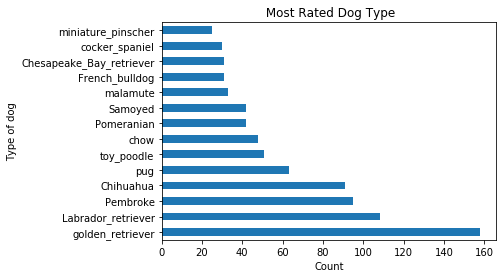

In [70]:
df_dog_type = df_.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title(' Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

#### - The golden retriever is the most common dog as it appears in the chart

<a id='Ins2'></a>

### Insight two

In [71]:
df_dog_type_mean = df_.groupby('dog_type').mean()

In [72]:

df_dog_type_mean.head()

rating_numerator  rating_denominator  \
dog_type                                                               
Afghan_hound                            9.666667                10.0   
Airedale                                9.833333                10.0   
American_Staffordshire_terrier         10.312500                10.0   
Appenzeller                            11.000000                10.0   
Australian_terrier                     11.500000                10.0   

                                       year     month        day    rating  
dog_type                                                                    
Afghan_hound                    2016.666667  4.666667  16.000000  0.966667  
Airedale                        2015.583333  8.750000  15.916667  0.983333  
American_Staffordshire_terrier  2016.187500  5.250000  15.000000  1.031250  
Appenzeller                     2016.500000  4.500000  18.500000  1.100000  
Australian_terrier              2016.500000  3.500000   7.000000  1.150000

In [73]:
df_dog_type_sorted = df_dog_type_mean['rating'].sort_values()

df_dog_type_sorted

dog_type
Japanese_spaniel               0.500000
soft-coated_wheaten_terrier    0.880000
Scotch_terrier                 0.900000
Walker_hound                   0.900000
Tibetan_terrier                0.925000
                                 ...   
briard                         1.233333
Pomeranian                     1.247619
Saluki                         1.250000
Bouvier_des_Flandres           1.300000
clumber                        2.700000
Name: rating, Length: 113, dtype: float64

#### Japanese_spaniel has the lowest average rating Clumber has the highest average rating

<a id='Ins3'></a>

### Insight##3 and Visualization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


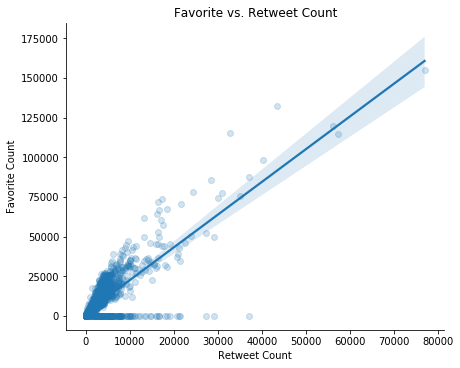

In [74]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=tweet_json_clean,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

#### Favorite and retweet counts are positively correlated.